**Wine Quality Prediction Model using only Linear Regression**

**Uploading the Zip File and Unzipping it**

In [164]:
import zipfile
zip=zipfile.ZipFile("/content/archive (3).zip","r")
zip.extractall('/content')
zip.close()

**Reading the Dataset**

In [211]:
import pandas as pd
df=pd.read_csv("/content/winequalityN.csv")
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [212]:
#Checking if any Categorical Data is Present or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [213]:
#Checking Null Values if Present
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [214]:
#Dropping the Null Values
df.dropna(inplace=True)

In [215]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [216]:
#Checking Duplicate Values if Present
df.duplicated().sum()

1168

In [217]:
#Dropping the Duplicated Values
df.drop_duplicates(inplace=True)

In [218]:
df.duplicated().sum()

0

In [219]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000
mean,7.218008,0.344021,0.318782,5.051029,0.056690,30.046837,114.118225,0.994536,3.224385,0.533199,10.550154,5.796034
std,1.320690,0.168237,0.147112,4.500641,0.036901,17.827151,56.787187,0.002969,0.160155,0.149851,1.186533,0.880005
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994670,3.210000,0.510000,10.400000,6.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,154.000000,0.996780,3.330000,0.600000,11.400000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [220]:
df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

In [247]:
df[df['quality']==5]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
10,white,8.1,0.270,0.41,1.45,0.033,11.0,63.0,0.99080,2.99,0.56,12.0,5
11,white,8.6,0.230,0.40,4.20,0.035,17.0,109.0,0.99470,3.14,0.53,9.7,5
12,white,7.9,0.180,0.37,1.20,0.040,16.0,75.0,0.99200,3.18,0.63,10.8,5
14,white,8.3,0.420,0.62,19.25,0.040,41.0,172.0,1.00020,2.98,0.67,9.7,5
19,white,6.5,0.310,0.14,7.50,0.044,34.0,133.0,0.99550,3.22,0.50,9.5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6480,red,6.1,0.715,0.10,2.60,0.053,13.0,27.0,0.99362,3.57,0.50,11.9,5
6481,red,6.2,0.460,0.29,2.10,0.074,32.0,98.0,0.99578,3.33,0.62,9.8,5
6487,red,6.6,0.725,0.20,7.80,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
6492,red,6.2,0.600,0.08,2.00,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5


In [223]:
df['quality'].value_counts()

6    2311
5    1745
7     852
4     204
8     148
3      30
9       5
Name: quality, dtype: int64

In [224]:
# There are no categorical variables. each feature is a number. Regression problem.
# Given the set of values for features, we have to predict the quality of wine.
# Finding correlation of each feature with our target variable - quality
correlations = df.corr()['quality'].drop('quality')
print(correlations)

fixed acidity          -0.079599
volatile acidity       -0.265214
citric acid             0.097926
residual sugar         -0.054625
chlorides              -0.202016
free sulfur dioxide     0.053786
total sulfur dioxide   -0.050728
density                -0.325338
pH                      0.038903
sulphates               0.041806
alcohol                 0.470143
Name: quality, dtype: float64


<ipython-input-224-0999df30a2f8>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()['quality'].drop('quality')


**Heatmap**

<ipython-input-225-150a5cdc4614>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


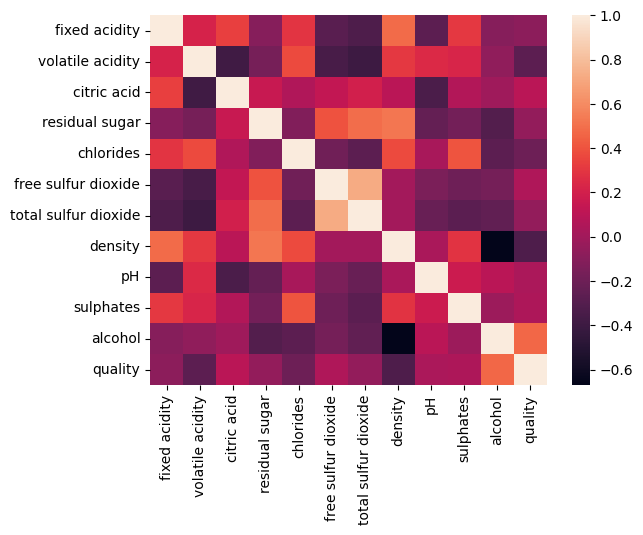

In [225]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr())
plt.show()

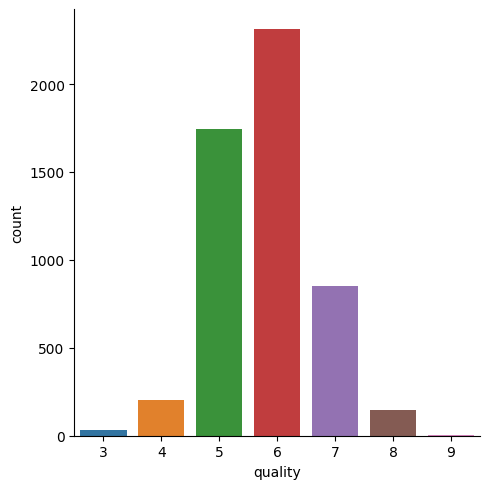

In [226]:
# Number of values for each quality
sns.catplot(x='quality', data = df, kind = 'count')

**Splitting the Independent and Dependent**

**Independent Varibale**

In [227]:
X=df.drop(columns=['type','quality'])
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
6,6.2,0.320,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6
...,...,...,...,...,...,...,...,...,...,...,...
6490,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
6491,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


**Target or Dependent Variable**

In [228]:
#Setting a threshold as 6 to be good quality of wine and encoding it as 1 if greater than 6 otherwise 0
y=df['quality'].apply(lambda y_value: 1 if y_value>=6 else 0)
y

0       1
1       1
2       1
3       1
6       1
       ..
6490    1
6491    1
6492    0
6495    0
6496    1
Name: quality, Length: 5295, dtype: int64

In [229]:
#Checking whether the Target data is Balanced or not
y.value_counts()

1    3316
0    1979
Name: quality, dtype: int64

**Oversampling the Imbalanced Data to get Balanced**

In [230]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
# Transforming the dataset
X, y = oversample.fit_resample(X, y)

In [231]:
y.value_counts()

1    3316
0    3316
Name: quality, dtype: int64

**Training and Testing the model**

In [232]:
from sklearn.model_selection import train_test_split,cross_val_score
#Splitting the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Linear Regression Model**

In [233]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([0.38301474, 0.50741187, 0.52331316, ..., 0.46421452, 1.10994361,
       0.62721958])

**Train Score**

In [234]:
model.score(X_train,y_train)

0.2857638616687681

**Test Score**

In [235]:
model.score(X_test,y_test)

0.28296267693442057

**Calculating Various Regression Scores or Metrics**

In [236]:
#Calculating mse,r2,rmse and mae
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f"Root Mean Square Error: {rmse}")
print(f"Mean Absolute Error: {mae}")


Mean Squared Error: 0.17924701318912584
R-squared: 0.28296267693442057
Root Mean Square Error: 0.4233757352389551
Mean Absolute Error: 0.36447836234161146


**Predicting the Wine Quality having Quality=8 (which is Assumed to be Good)**

In [237]:
import numpy as np

input_data = (8.6,	0.42,	0.39,	1.8,	0.068,	6.0,	12.0,	0.99516	,3.35	,0.69,	11.7	)

# Changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print("Predicted Score is ",prediction[0])

if (prediction[0]>0.6):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

Predicted Score is  0.8045222207126201
Good Quality Wine


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**Predicting the Wine Quality having Quality=4 (which is Assumed to be Bad)**

In [248]:
import numpy as np

input_data = (5.9	,0.645,	0.12,	2.00	,0.075,	32.0	,44.0	,0.99547,	3.57	,0.71	,10.2	)

# Changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print("Predicted Score is ",prediction[0])

if (prediction[0]>0.6):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

Predicted Score is  0.41547796341895804
Bad Quality Wine


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**As per the task given by Bharat Intern it was mentioned to use only Linear Regression Algorithm but in order to get really Good Model Performance and Optimal scores such as accuracy,precision and f1-score we can treat this model as a Classification model instead as Regression Model by using RandomForestClassifier,DecisionTree,ExtraTrees,XGBoost,LightBGM,SVC,GradientBoosting and various other Suitable Classifier Algorithms**